In [14]:
import numpy as np
import matplotlib.pyplot as plt

Due to refraction, the field of view (FOV) angle changes when the camera is emerged in water. This script computes the FOV for submerged cameras around the origin of the polar coordinate system.

In [15]:
def fov_land_to_water(fov_land):
    fov_water = np.arcsin(1/1.33*np.sin(fov_land/360*np.pi))/np.pi*360
    return fov_water

In [16]:
def compute_fov_cone(fov, distance_camera, theta_c):
    theta_c = (theta_c + 360) % 360

    r_max_distance = 30  # measure distance

    theta = fov / 360 * np.pi + np.arcsin(distance_camera / r_max_distance * np.sin(fov / 360 * np.pi))

    t_start = (360 - theta * 360 / np.pi) / 2
    t_end = t_start + theta * 360 / np.pi

    t_start = (t_start + theta_c + 360) % 360
    t_end = (t_end + theta_c + 360) % 360

    return t_start, t_end

In [17]:
# Plot the FOV for all cameras
def plot_results(theta_cam, FOV_land, c_plot):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    for i in range(len(theta_cam)):
        l1, r1 = compute_fov_cone(fov_land_to_water(FOV_land), rc[i], theta_cam[i])

        c1 = plt.polar([theta_cam[i] / 180 * np.pi, l1 / 180 * np.pi], [int(rc[i]), 30], color=c_plot[i])[0]
        x1 = c1.get_xdata()
        y1 = c1.get_ydata()
        c2 = plt.polar([theta_cam[i] / 180 * np.pi, r1 / 180 * np.pi], [int(rc[i]), 30], color=c_plot[i])[0]
        x2 = c2.get_xdata()
        plt.fill_betweenx(y1, x1, x2, color=c_plot[i], alpha=0.3)
        ax.scatter(theta_cam[i]/180*np.pi, rc[i], c=c_plot[i])

        yint = range(0, 30,3)
        plt.yticks(yint)

    plt.show()

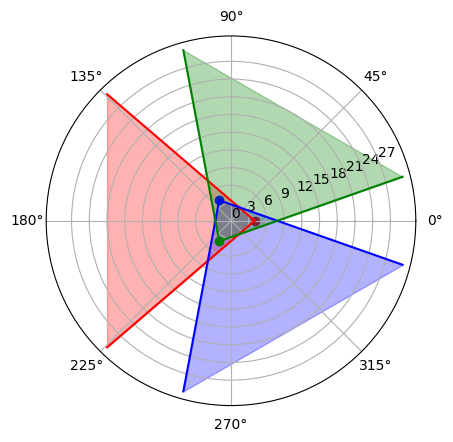

In [18]:
# Settings
FOV_land = 120  # FOV angle on land

theta_cam = [0, 120, 240]  # position of camera around center point [cam1, cam2, ...., camN] [degrees]
rc = [4, 4, 4]  # distance of camera [cam1, cam2, ...., camN] [m]
c_plot = ['r', 'b', 'g'] # color of plot

plot_results(theta_cam, FOV_land, c_plot)

Here we can see that obtain dead spots behind the cameras, about 5m . We could for example place two stereo pairs in front of each other and two single cameras on the sides to detect if a jack is present or not.

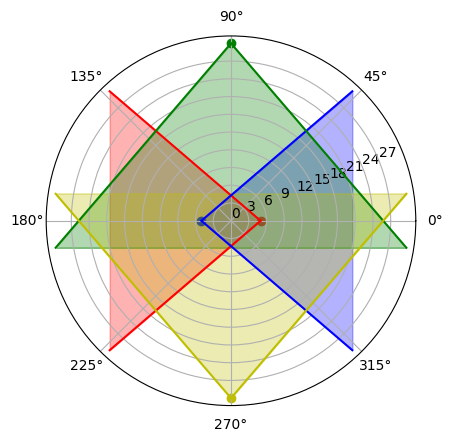

In [19]:
# Settings
FOV_land = 120  # FOV angle on land

theta_cam = [0, 180, 90, 270]  # position of camera around center point [cam1, cam2, ...., camN] [degrees]
rc = [5, 5, 30, 30]  # distance of camera [cam1, cam2, ...., camN] [m]
c_plot = ['r', 'b', 'g', 'y'] # color of plot

plot_results(theta_cam, FOV_land, c_plot)


Here the yellow and red fields correspond to the single cameras and the blue and red field to the stereo cameras. The stereo pairs cover an area of a radius of 3 meter around the center of the bommie. Furthermore, this setup is les sensitive to their actual position.

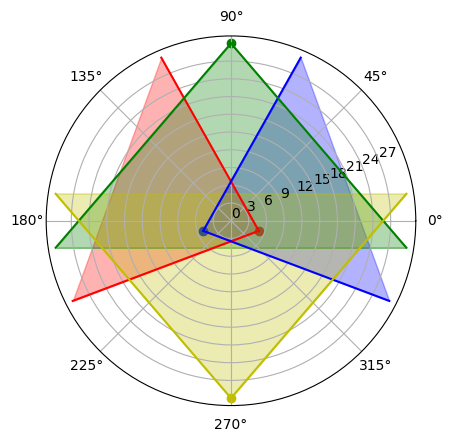

In [20]:
# Settings
FOV_land = 120  # FOV angle on land

theta_cam = [0-20, 180+20, 90, 270]  # position of camera around center point [cam1, cam2, ...., camN] [degrees]
rc = [5, 5, 30, 30]  # distance of camera [cam1, cam2, ...., camN] [m]
c_plot = ['r', 'b', 'g', 'y'] # color of plot

plot_results(theta_cam, FOV_land, c_plot)

Here the cameras are off by 20 degrees and still have a radius of 18m covered
